In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Last 5 entries

In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 891
Number of Columns 12


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


to get overall stats and find possible outliers

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


minimum age is .42

In [14]:
sum(data['Age']<= 1)

14

In [15]:
data[data['Age']<= 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


Now see the null values

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
data[data['Age'].isnull()].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


<Axes: >

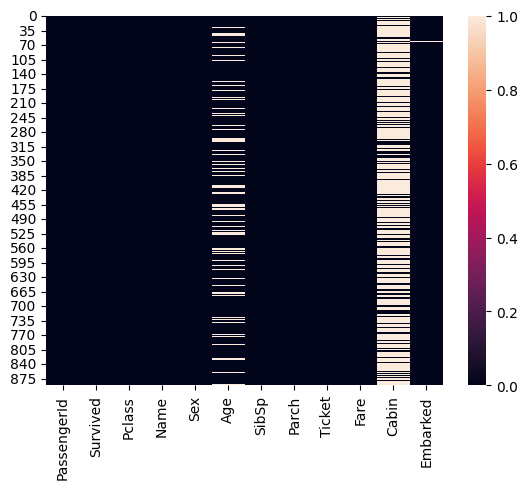

In [25]:
%matplotlib inline
sns.heatmap(data.isnull())

In [26]:
sum(data['Sex']=='male')

577

In [27]:
sum(data['Survived']==1)

342

In [28]:
per_missing = data.isnull().sum() * 100 / len(data)
per_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Its better to drop the colomn with so many missing

In [30]:
data.drop('Cabin', axis = 1 , inplace=True)

In [31]:
per_missing = data.isnull().sum() * 100 / len(data)
per_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [34]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [35]:
data['Embarked'].fillna('S' , inplace = True)

In [37]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [39]:
per_missing = data.isnull().sum() * 100 / len(data)
per_missing

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [40]:
data['Gender']=data['Sex'].map({'male':1,'female':0})

In [41]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,0


In [49]:
pd.get_dummies(data,columns=['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,1,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,True,False,False


In [52]:
data1= pd.get_dummies(data,columns=['Embarked'],drop_first=True)

In [53]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,1,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,1,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,False,False


In [54]:
data1.replace({False: 0, True: 1}, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9996\2267694581.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1.replace({False: 0, True: 1}, inplace=True)


In [55]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,0,0


In [56]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [57]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,0
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,0
4,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,0
889,1,1,male,26.000000,0,0,30.0000,C,1


In [58]:
data1.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
0,0,3,male,22.000000,1,0,7.2500,1,0,1
1,1,1,female,38.000000,1,0,71.2833,0,0,0
2,1,3,female,26.000000,0,0,7.9250,0,0,1
3,1,1,female,35.000000,1,0,53.1000,0,0,1
4,0,3,male,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,1,0,1
887,1,1,female,19.000000,0,0,30.0000,0,0,1
888,0,3,female,29.699118,1,2,23.4500,0,0,1
889,1,1,male,26.000000,0,0,30.0000,1,0,0


In [59]:
data2= pd.get_dummies(data,columns=['Pclass'])

In [60]:
data2

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.000000,1,0,7.2500,S,1,False,False,True
1,1,female,38.000000,1,0,71.2833,C,0,True,False,False
2,1,female,26.000000,0,0,7.9250,S,0,False,False,True
3,1,female,35.000000,1,0,53.1000,S,0,True,False,False
4,0,male,35.000000,0,0,8.0500,S,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,S,1,False,True,False
887,1,female,19.000000,0,0,30.0000,S,0,True,False,False
888,0,female,29.699118,1,2,23.4500,S,0,False,False,True
889,1,male,26.000000,0,0,30.0000,C,1,True,False,False


In [61]:
data2 = data2*1

In [62]:
data2

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.000000,1,0,7.2500,S,1,0,0,1
1,1,female,38.000000,1,0,71.2833,C,0,1,0,0
2,1,female,26.000000,0,0,7.9250,S,0,0,0,1
3,1,female,35.000000,1,0,53.1000,S,0,1,0,0
4,0,male,35.000000,0,0,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,S,1,0,1,0
887,1,female,19.000000,0,0,30.0000,S,0,1,0,0
888,0,female,29.699118,1,2,23.4500,S,0,0,0,1
889,1,male,26.000000,0,0,30.0000,C,1,1,0,0


In [64]:
data1["pasenger_id"] = data1.reset_index().index

In [65]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S,pasenger_id
0,0,3,male,22.000000,1,0,7.2500,1,0,1,0
1,1,1,female,38.000000,1,0,71.2833,0,0,0,1
2,1,3,female,26.000000,0,0,7.9250,0,0,1,2
3,1,1,female,35.000000,1,0,53.1000,0,0,1,3
4,0,3,male,35.000000,0,0,8.0500,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,1,0,1,886
887,1,1,female,19.000000,0,0,30.0000,0,0,1,887
888,0,3,female,29.699118,1,2,23.4500,0,0,1,888
889,1,1,male,26.000000,0,0,30.0000,1,0,0,889


In [66]:
data2["pasenger_id"] = data2.reset_index().index
data2

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Pclass_1,Pclass_2,Pclass_3,pasenger_id
0,0,male,22.000000,1,0,7.2500,S,1,0,0,1,0
1,1,female,38.000000,1,0,71.2833,C,0,1,0,0,1
2,1,female,26.000000,0,0,7.9250,S,0,0,0,1,2
3,1,female,35.000000,1,0,53.1000,S,0,1,0,0,3
4,0,male,35.000000,0,0,8.0500,S,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,S,1,0,1,0,886
887,1,female,19.000000,0,0,30.0000,S,0,1,0,0,887
888,0,female,29.699118,1,2,23.4500,S,0,0,0,1,888
889,1,male,26.000000,0,0,30.0000,C,1,1,0,0,889


In [73]:
data3 = pd.merge(data1, data2, how="inner", on=["pasenger_id","Survived","Sex","Age","SibSp","Parch","Fare","Gender"])

In [77]:
data3.drop(['Pclass','Embarked'],axis=1,inplace=True)

KeyError: "['Pclass', 'Embarked'] not found in axis"

In [78]:
data3

,Survived,Sex,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S,pasenger_id,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.000000,1,0,7.2500,1,0,1,0,0,0,1
1,1,female,38.000000,1,0,71.2833,0,0,0,1,1,0,0
2,1,female,26.000000,0,0,7.9250,0,0,1,2,0,0,1
3,1,female,35.000000,1,0,53.1000,0,0,1,3,1,0,0
4,0,male,35.000000,0,0,8.0500,1,0,1,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,1,0,1,886,0,1,0
887,1,female,19.000000,0,0,30.0000,0,0,1,887,1,0,0
888,0,female,29.699118,1,2,23.4500,0,0,1,888,0,0,1
889,1,male,26.000000,0,0,30.0000,1,0,0,889,1,0,0


How Many People Survived And How Many Died?

In [79]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,0
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,0
4,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,0
889,1,1,male,26.000000,0,0,30.0000,C,1


In [80]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

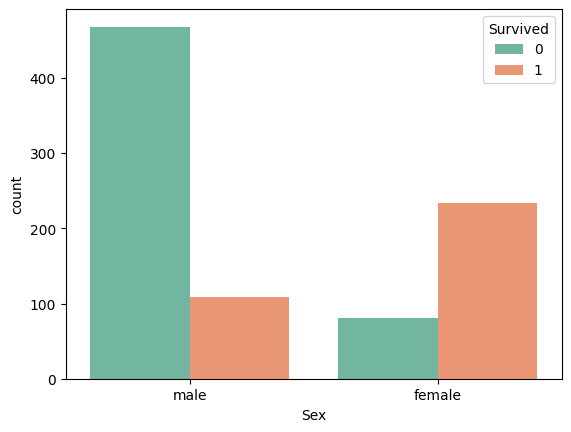

In [86]:
sns.countplot(data, x="Sex" , hue = "Survived", palette = "Set2")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9996\2321717150.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x="Pclass", palette = "Set2", legend=True)


<Axes: xlabel='Pclass', ylabel='count'>

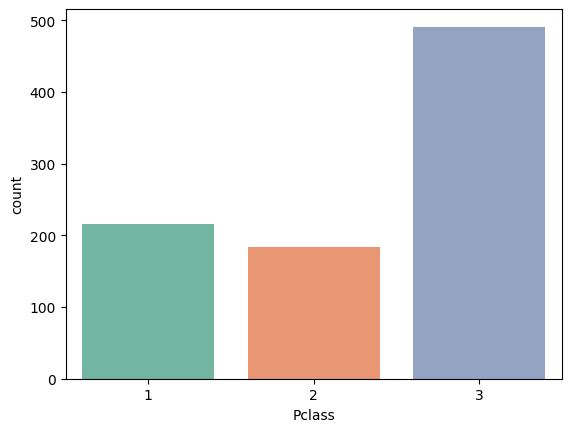

In [102]:
sns.countplot(data, x="Pclass", palette = "Set2", legend=True)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

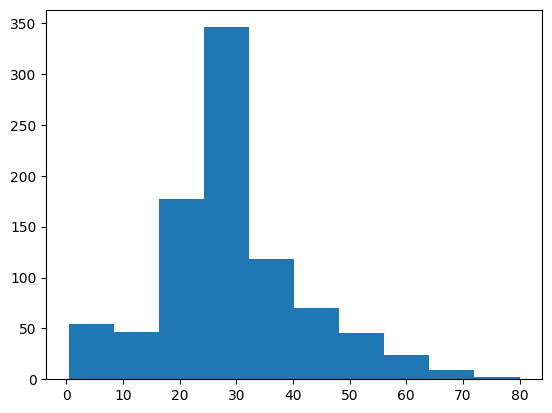

In [92]:
plt.hist(data['Age'],bins=10)

<Axes: xlabel='Age'>

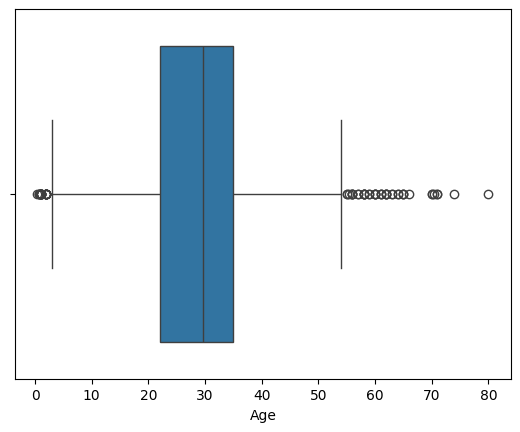

In [93]:
sns.boxplot(data['Age'],orient='h')

<Axes: ylabel='Survived'>

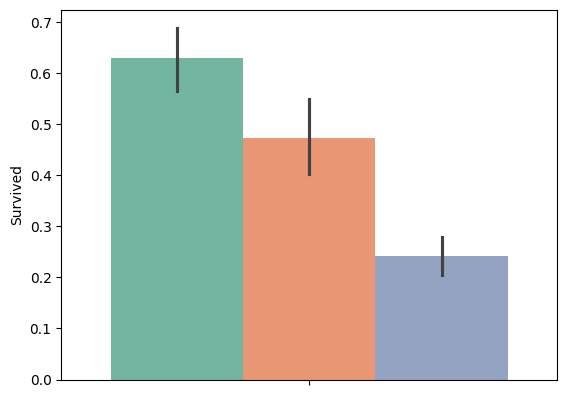

In [99]:
sns.barplot(hue='Pclass',y='Survived',data=data, palette = "Set2", legend=False)

<Axes: xlabel='Pclass', ylabel='count'>

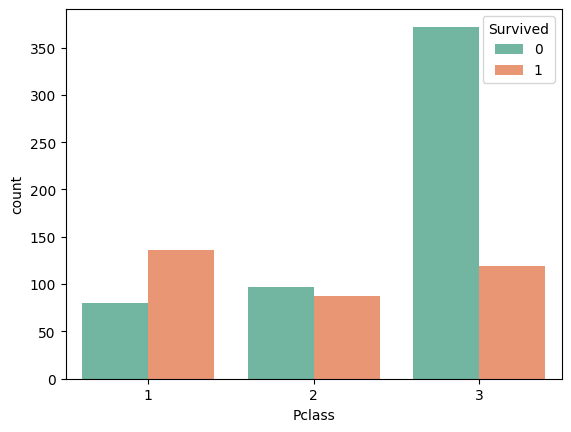

In [96]:
sns.countplot(data, x="Pclass" , hue = "Survived", palette = "Set2")